## EDA-Exploratory Data Analytics on Titanic-Dataset

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [93]:
df = pd.read_csv("Titanic-Dataset.csv")
df.shape

(891, 12)

In [94]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [97]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [98]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### Separating first and last name

In [99]:

df["LName"] = df["Name"].str.split(',').str.get(0)
df["Name"]=df["Name"].str.split(',').str.get(1)


In [100]:
df["Age"].dtype

dtype('float64')

##### Replacing NaN values in Cabin column with string: "No cabin allotted"

In [101]:
df.loc[df["Cabin"].isna(), "Cabin"] = "No Cabin Allotted"
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LName
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,No Cabin Allotted,S,Braund
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin Allotted,S,Heikkinen
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,No Cabin Allotted,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev. Juozas,male,27.0,0,0,211536,13.0000,No Cabin Allotted,S,Montvila
887,888,1,1,Miss. Margaret Edith,female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,No Cabin Allotted,S,Johnston
889,890,1,1,Mr. Karl Howell,male,26.0,0,0,111369,30.0000,C148,C,Behr


In [91]:
# df = pd.read_csv("Titanic-Dataset.csv")
# df.shape

(891, 12)

In [107]:
df.rename(columns = {'Name' : 'First Name', 'LName' : 'Last Name'}, inplace = True)
df.head()

,PassengerId,Survived,Pclass,First Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
0,1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,No Cabin Allotted,S,Braund
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin Allotted,S,Heikkinen
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,No Cabin Allotted,S,Allen


##### Rearranging the columns

In [129]:
df2 =df.copy()

In [141]:
# New order
new_order = [0, 1, 2, 3, 12, 4, 5, 6, 7, 8, 9, 10, 11]
df3 = df2.iloc[:, new_order]
df3.head()

,PassengerId,Survived,Pclass,First Name,Last Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr. Owen Harris,Braund,male,22.0,1,0,A/5 21171,7.2500,No Cabin Allotted,S
1,2,1,1,Mrs. John Bradley (Florence Briggs Thayer),Cumings,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss. Laina,Heikkinen,female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin Allotted,S
3,4,1,1,Mrs. Jacques Heath (Lily May Peel),Futrelle,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr. William Henry,Allen,male,35.0,0,0,373450,8.0500,No Cabin Allotted,S


### Visualisation

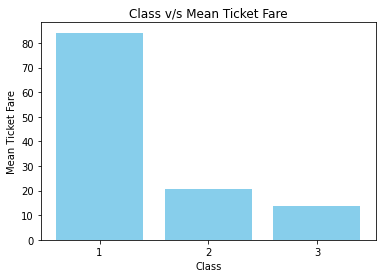

In [236]:
df4=df3.groupby("Pclass")["Fare"].mean().reset_index()
plt.bar(df4["Pclass"],df4["Fare"],color="skyblue")
plt.xlabel("Class")
plt.ylabel("Mean Ticket Fare")
plt.title("Class v/s Mean Ticket Fare")
plt.xticks([1,2,3])
plt.show()

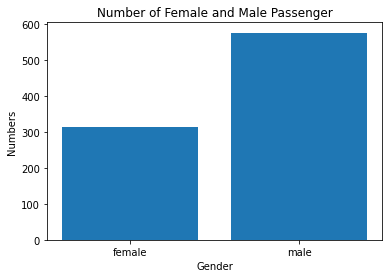

In [209]:
df5=df3.groupby("Sex")["PassengerId"].count().reset_index()
plt.bar(df5["Sex"],df5["PassengerId"])
plt.xlabel("Gender")
plt.ylabel("Numbers")
plt.title("Number of Female and Male Passenger")
plt.show()

In [210]:
df6=df3[df3["Survived"]==1].groupby("Sex")["Survived"].count().reset_index()
df6

,Sex,Survived
0,female,233
1,male,109


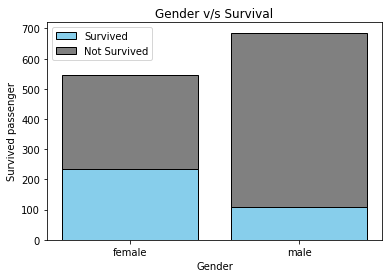

In [244]:
plt.bar(df6["Sex"],df6["Survived"],color="skyblue",edgecolor="black", label = "Survived")
plt.bar(df5["Sex"],df5["PassengerId"],color="grey",bottom=df6["Survived"],edgecolor="black", label = "Not Survived")
plt.xlabel("Gender")
plt.ylabel("Survived passenger")
plt.title("Gender v/s Survival")
plt.legend()
plt.show()

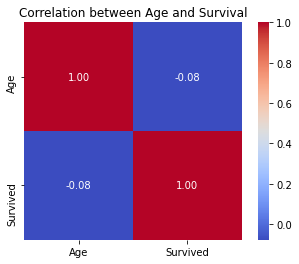

In [247]:
acm = df[["Age", "Survived"]].corr()
plt.title("Correlation between Age and Survival")
sns.heatmap(acm, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.show()

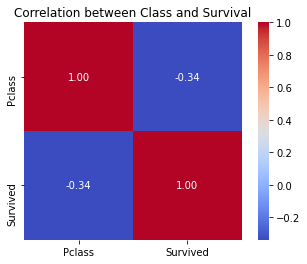

In [248]:
cm=df[["Pclass","Survived"]].corr()
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation between Class and Survival")
plt.show()

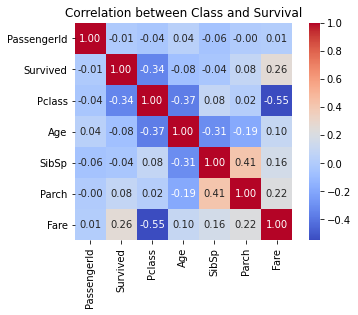

In [255]:
tcm=df.corr()
sns.heatmap(tcm, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation between Class and Survival")
plt.show()

In [258]:
df[df["Age"]==80]

,PassengerId,Survived,Pclass,First Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last Name
630,631,1,1,Mr. Algernon Henry Wilson,male,80.0,0,0,27042,30.0,A23,S,Barkworth


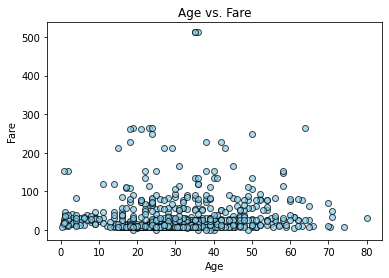

In [253]:
plt.scatter(df['Age'], df['Fare'], alpha=0.7, edgecolor="black", color = "skyblue")
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()